In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install wordcloud


In [4]:
import pandas as pd
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
# ✅ Manual stopwords list (since nltk can't be used offline)
custom_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", 
    "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 
    'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 
    'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 
    'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 
    "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 
    "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', 
    "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
    'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
    "weren't", 'won', "won't", 'wouldn', "wouldn't"
}

In [6]:

apps_df = pd.read_csv(r"C:\Users\dell\Downloads\Play Store Data (1).csv")

In [7]:
reviews_df = pd.read_csv(r"C:\Users\dell\Downloads\User Reviews.csv")

In [8]:
apps_df.columns = apps_df.columns.str.strip()
reviews_df.columns = reviews_df.columns.str.strip()
apps_df['App'] = apps_df['App'].str.lower()
reviews_df['App'] = reviews_df['App'].str.lower()

In [9]:
health_apps = apps_df[apps_df['Category'] == 'HEALTH_AND_FITNESS']['App'].unique()

In [10]:
filtered_reviews = reviews_df[
    (reviews_df['App'].isin(health_apps)) & 
    (reviews_df['Sentiment'] == 'Positive')
].copy()

In [11]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    return " ".join([
        word for word in words
        if word not in custom_stopwords and word not in health_apps and word.isalpha()
    ])

filtered_reviews['cleaned_text'] = filtered_reviews['Translated_Review'].astype(str).apply(clean_text)

In [12]:
all_text = " ".join(filtered_reviews['cleaned_text'].tolist())

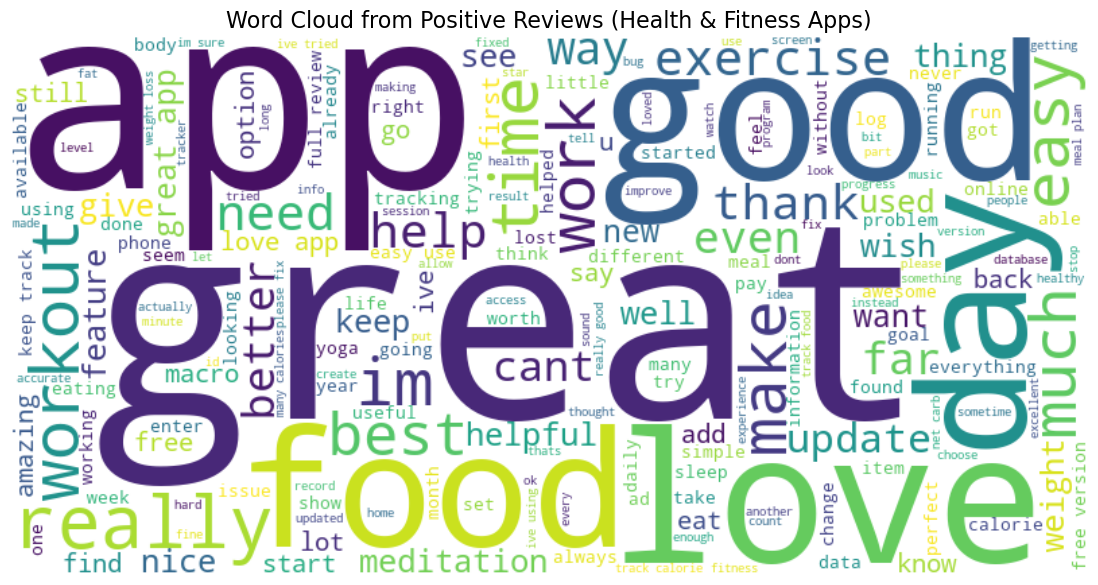

In [13]:
if all_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud from Positive Reviews (Health & Fitness Apps)", fontsize=16)
    plt.show()
else:
    print(" No text found after filtering and cleaning.")

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [15]:
apps_df = pd.read_csv(r"C:\Users\dell\Downloads\Play Store Data (1).csv")

In [16]:
def convert_size(size):
    if pd.isna(size) or size == 'Varies with device':
        return None
    size = size.strip().upper()
    if size.endswith('M'):
        return float(size[:-1])
    elif size.endswith('K'):
        return float(size[:-1]) / 1024
    return None

apps_df['Size_MB'] = apps_df['Size'].apply(convert_size)

In [17]:
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')

In [18]:
filtered = apps_df[
    (apps_df['Rating'] >= 4.0) &
    (apps_df['Size_MB'] >= 10) &
    (apps_df['Last Updated'].dt.month == 1)
]


In [19]:
group = filtered.groupby('Category').agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'count'
}).rename(columns={
    'Rating': 'Avg Rating',
    'Reviews': 'Total Reviews',
    'Installs': 'App Count'
})
 

In [20]:
top = group.sort_values('App Count', ascending=False).head(10)


C:\Users\dell\AppData\Local\Temp\ipykernel_8668\1068470271.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


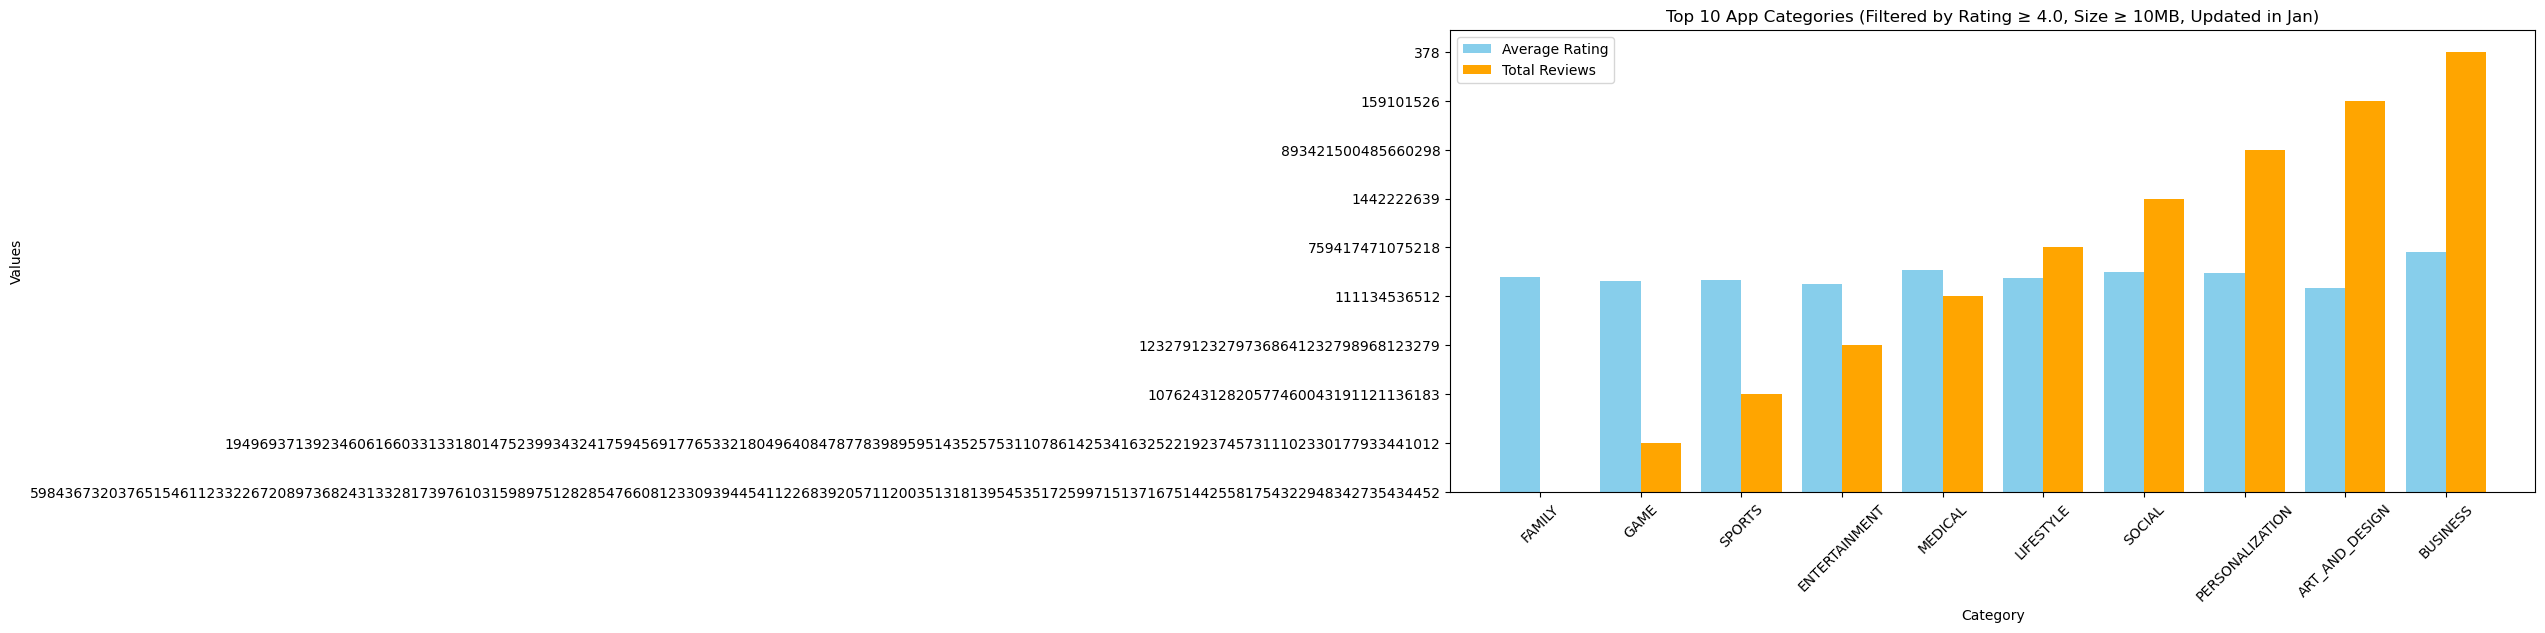

In [21]:
x = range(len(top))
bar_width = 0.4

plt.figure(figsize=(14, 6))
plt.bar(x, top['Avg Rating'], width=bar_width, label='Average Rating', color='skyblue')
plt.bar([i + bar_width for i in x], top['Total Reviews'], width=bar_width, label='Total Reviews', color='orange')

plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Top 10 App Categories (Filtered by Rating ≥ 4.0, Size ≥ 10MB, Updated in Jan)')
plt.xticks([i + bar_width / 2 for i in x], top.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
plt.figure(figsize=(18, 8))  # Wider and taller


<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

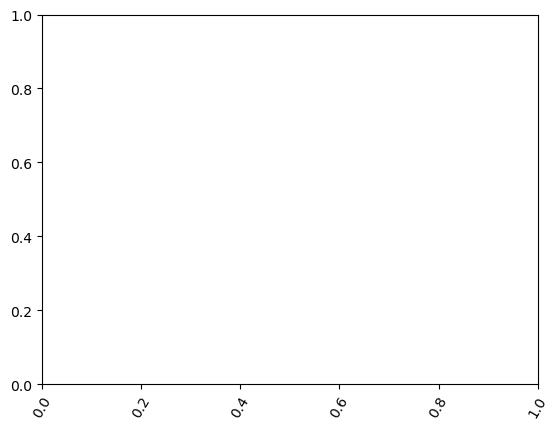

In [23]:
plt.xticks(rotation=60)


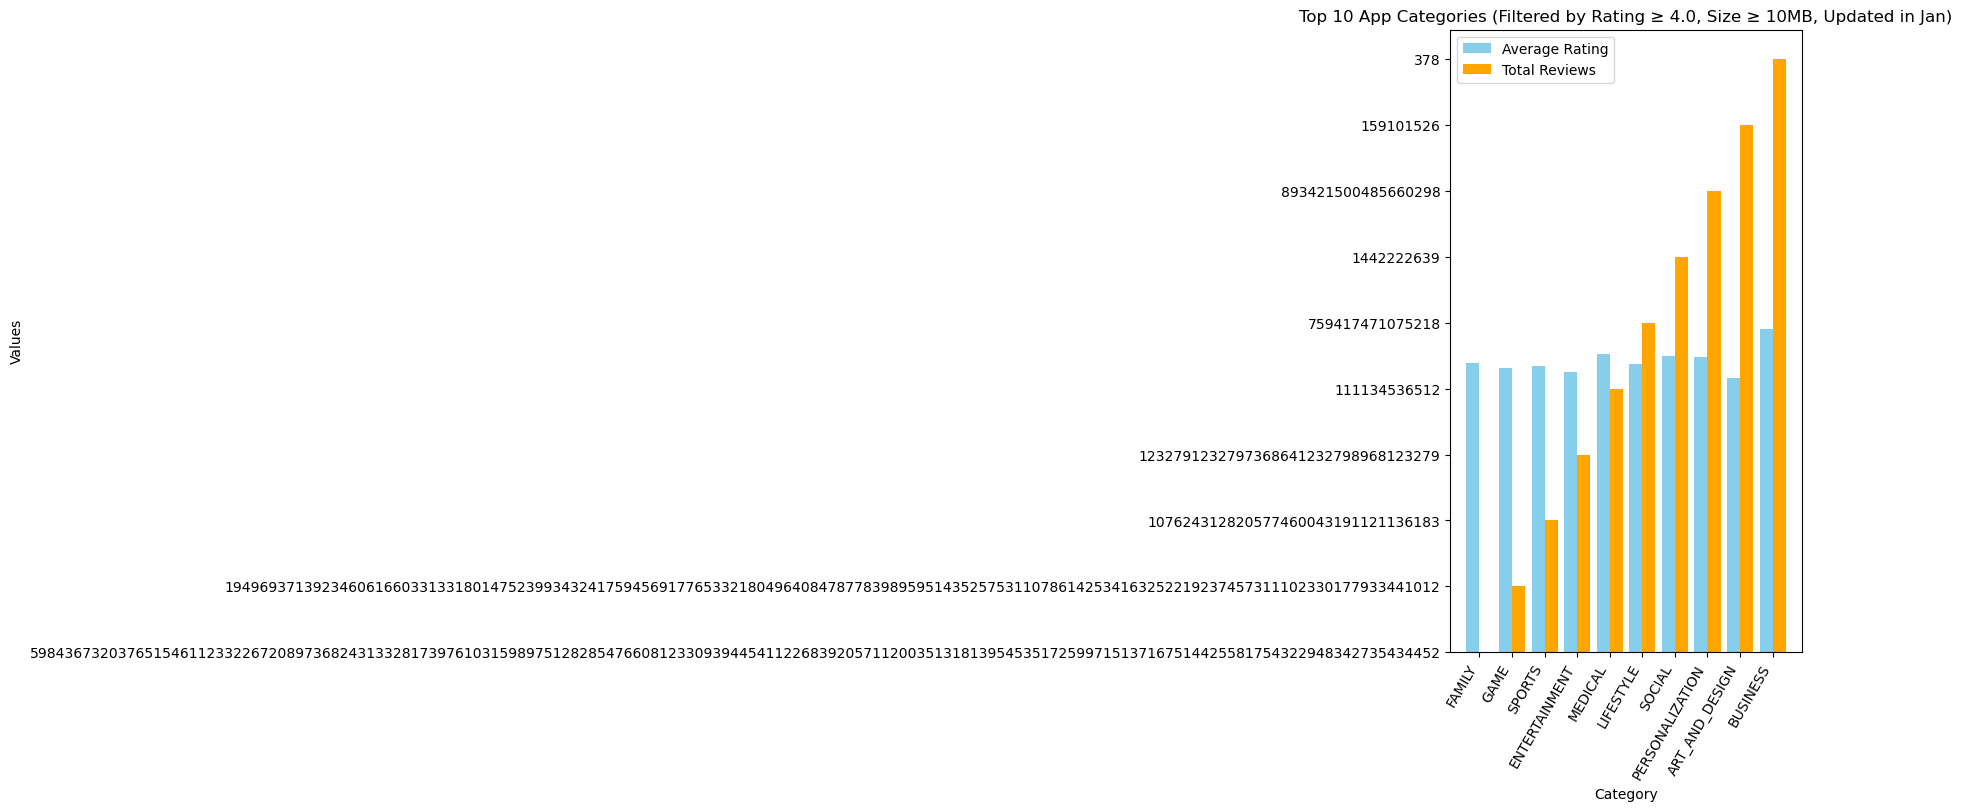

In [24]:
plt.figure(figsize=(18, 8), constrained_layout=True)
x = range(len(top))
bar_width = 0.4

plt.bar(x, top['Avg Rating'], width=bar_width, label='Average Rating', color='skyblue')
plt.bar([i + bar_width for i in x], top['Total Reviews'], width=bar_width, label='Total Reviews', color='orange')

plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Top 10 App Categories (Filtered by Rating ≥ 4.0, Size ≥ 10MB, Updated in Jan)')
plt.xticks([i + bar_width / 2 for i in x], top.index, rotation=60, ha='right')
plt.legend()
plt.show()


In [25]:
import pandas as pd
import plotly.express as px
from datetime import datetime




In [26]:

apps_df = pd.read_csv(r"C:\Users\dell\Downloads\Play Store Data (1).csv")



In [27]:

apps_df.columns = apps_df.columns.str.strip()


In [28]:
def clean_installs(val):
    try:
        if isinstance(val, str):
            val = val.replace('+', '').replace(',', '').strip()
            return int(val) if val.isdigit() else 0
        return int(val)
    except:
        return 0


In [29]:
apps_df['Clean_Installs'] = apps_df['Installs'].apply(clean_installs)


In [30]:
# Filter categories not starting with A, C, G, or S
valid_categories = apps_df['Category'].dropna().unique()
filtered_categories = [cat for cat in valid_categories if not cat.startswith(('A', 'C', 'G', 'S'))]

filtered_df = apps_df[apps_df['Category'].isin(filtered_categories)]


        

In [31]:


# ✅ Step 4: Group by category and sum installs
category_grouped = filtered_df.groupby('Category').agg({'Clean_Installs': 'sum'}).reset_index()


In [32]:


# ✅ Step 5: Take top 5 categories by installs
top5 = category_grouped.sort_values('Clean_Installs', ascending=False).head(5).copy()



In [33]:



# ✅ Step 6: Simulate country codes (for visualization purposes)
top5['country'] = ['USA', 'CAN', 'AUS', 'GBR', 'IND']  # Dummy ISO-3 codes
top5['highlight'] = top5['Clean_Installs'] > 1_000_000


In [34]:


# ✅ Step 7: Time Check (IST between 6PM and 8PM)
ist_now = datetime.utcnow() + pd.Timedelta(hours=5, minutes=30)
    

C:\Users\dell\AppData\Local\Temp\ipykernel_8668\4012567433.py:2: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ist_now = datetime.utcnow() + pd.Timedelta(hours=5, minutes=30)


In [37]:
if 18 <= ist_now.hour < 20:
    # ✅ Step 8: Plot Choropleth
    fig = px.choropleth(
        top5,
        locations='country',
        color='Clean_Installs',
        hover_name='Category',
        color_continuous_scale='Plasma',
        title='Top 5 App Categories by Global Installs (Filtered)',
        labels={'Clean_Installs': 'Total Installs'}
    )

    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=False),
        title_x=0.5
    )
    fig.show()
else:
    print(" Choropleth map is hidden. It is only shown between 6 PM and 8 PM IST.")

 Choropleth map is hidden. It is only shown between 6 PM and 8 PM IST.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [74]:
apps_df = pd.read_csv(r"C:\Users\dell\Downloads\Play Store Data (1).csv")

In [76]:
def convert_size(size):
    if pd.isna(size) or size == 'Varies with device':
        return None
    size = size.strip().upper()
    if size.endswith('M'):
        return float(size[:-1])
    elif size.endswith('K'):
        return float(size[:-1]) / 1024
    return None

def clean_installs(val):
    try:
        val = str(val).replace('+', '').replace(',', '').strip()
        return int(val) if val.isdigit() else 0
    except:
        return 0

def clean_price(price):
    try:
        price = str(price).replace('$', '').strip()
        return float(price) if price else 0.0
    except:
        return 0.0



In [78]:
apps_df['Size_MB'] = apps_df['Size'].apply(convert_size)
apps_df['Clean_Installs'] = apps_df['Installs'].apply(clean_installs)
apps_df['Clean_Price'] = apps_df['Price'].apply(clean_price)
apps_df['App'] = apps_df['App'].astype(str)

In [80]:
apps_df['Revenue'] = apps_df.apply(
    lambda row: row['Clean_Installs'] * row['Clean_Price'] if row['Type'] == 'Paid' else 0, axis=1)

In [92]:
lambda x: float('.'.join(str(x).split('.')[0:2])) if isinstance(x, str) and x[0].isdigit() else 0


<function __main__.<lambda>(x)>

In [96]:
# Step 1: Clean and extract only the numeric part like 4.2 from '4.2 and up'
def extract_android_version(x):
    try:
        # Extract only digits and first dot, like 4.2
        version_str = str(x).strip().split()[0]  # takes '4.2' from '4.2 and up'
        return float(version_str)
    except:
        return 0.0  # fallback for 'Varies with device' or empty

# Step 2: Apply the function
apps_df['Parsed_Android_Ver'] = apps_df['Android Ver'].apply(extract_android_version)


In [98]:
filtered = apps_df[
    (apps_df['Clean_Installs'] >= 10000) &
    (apps_df['Revenue'] >= 10000) &
    (apps_df['Parsed_Android_Ver'] > 4.0) &
    (apps_df['Size_MB'] >= 15) &
    (apps_df['Content Rating'] == 'Everyone') &
    (apps_df['App'].apply(lambda x: len(x) <= 30))
]


In [100]:
>>> extract_android_version('4.2 and up')
4.2


4.2

In [102]:
# 4. Select top 3 categories
top3_categories = filtered['Category'].value_counts().head(3).index.tolist()
top3_df = filtered[filtered['Category'].isin(top3_categories)]

In [104]:
# 5. Group by Category & Type
grouped = top3_df.groupby(['Category', 'Type']).agg({
    'Clean_Installs': 'mean',
    'Revenue': 'mean'
}).reset_index()

In [108]:
# 6. Check IST time
ist_now = datetime.utcnow() + pd.Timedelta(hours=5, minutes=30)


C:\Users\dell\AppData\Local\Temp\ipykernel_8668\2497700758.py:2: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ist_now = datetime.utcnow() + pd.Timedelta(hours=5, minutes=30)


In [110]:

if 13 <= ist_now.hour < 14:
    # 7. Plot Dual-Axis Chart
    fig, ax1 = plt.subplots(figsize=(12, 6))

    categories = grouped['Category'] + ' - ' + grouped['Type']
    x = range(len(categories))

    ax1.bar(x, grouped['Clean_Installs'], width=0.4, label='Avg Installs', color='skyblue')
    ax1.set_ylabel('Average Installs', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    ax2 = ax1.twinx()
    ax2.plot(x, grouped['Revenue'], color='orange', marker='o', label='Avg Revenue')
    ax2.set_ylabel('Average Revenue ($)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    plt.xticks(ticks=x, labels=categories, rotation=45)
    plt.title('Average Installs vs Revenue for Free vs Paid Apps (Top 3 Categories)')
    fig.tight_layout()
    plt.show()
else:
    print(f"Graph hidden – visible only between 1 PM and 2 PM IST. Current IST: {ist_now.strftime('%I:%M %p')}")

Graph hidden – visible only between 1 PM and 2 PM IST. Current IST: 05:51 PM


In [116]:

import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Load data
apps_df = pd.read_csv(r"C:\Users\dell\Downloads\Play Store Data (1).csv")

# Clean 'Installs' and 'Last Updated'
def clean_installs(val):
    try:
        val = str(val).replace('+', '').replace(',', '').strip()
        return int(val) if val.isdigit() else 0
    except:
        return 0

apps_df['Clean_Installs'] = apps_df['Installs'].apply(clean_installs)
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')

# Apply all filters
filtered = apps_df[
    apps_df['App'].apply(lambda x: isinstance(x, str) and x[0].lower() not in ['x', 'y', 'z']) &
    apps_df['App'].apply(lambda x: isinstance(x, str) and 's' not in x.lower()) &
    apps_df['Reviews'].apply(lambda x: int(x) if str(x).isdigit() else 0) > 500 &
    apps_df['Category'].apply(lambda x: isinstance(x, str) and x[0] in ['E', 'C', 'B'])
]

# Translate category labels
category_translation = {
    "Beauty": "सौंदर्य",          # Hindi
    "Business": "வணிகம்",        # Tamil
    "Dating": "Partnersuche"     # German
}

filtered['Translated Category'] = filtered['Category'].replace(category_translation)

# Create Year-Month column for grouping
filtered['YearMonth'] = filtered['Last Updated'].dt.to_period('M')
filtered = filtered.dropna(subset=['YearMonth'])

# Group by month and category
grouped = filtered.groupby(['YearMonth', 'Translated Category'])['Clean_Installs'].sum().reset_index()
grouped['YearMonth'] = grouped['YearMonth'].dt.to_timestamp()

# Check time condition
ist_now = datetime.utcnow() + pd.Timedelta(hours=5, minutes=30)
if 18 <= ist_now.hour < 21:
    plt.figure(figsize=(14, 7))

    for category in grouped['Translated Category'].unique():
        df_cat = grouped[grouped['Translated Category'] == category].sort_values('YearMonth')
        plt.plot(df_cat['YearMonth'], df_cat['Clean_Installs'], label=category)

        # Shade regions where growth > 20%
        df_cat['pct_change'] = df_cat['Clean_Installs'].pct_change()
        growth_periods = df_cat[df_cat['pct_change'] > 0.2]
        for i in growth_periods.index:
            if i > df_cat.index.min():
                x1 = df_cat.loc[i - 1, 'YearMonth']
                x2 = df_cat.loc[i, 'YearMonth']
                y1 = df_cat.loc[i - 1, 'Clean_Installs']
                y2 = df_cat.loc[i, 'Clean_Installs']
                plt.fill_between([x1, x2], [y1, y2], alpha=0.2, color='orange')

    plt.title("📈 Monthly Install Trends by Category (Highlighted Growth > 20%)")
    plt.xlabel("Month")
    plt.ylabel("Total Installs")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.legend(title="Category", loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f" Graph hidden – only available from 6 PM to 9 PM IST. Current IST: {ist_now.strftime('%I:%M %p')}")


 Graph hidden – only available from 6 PM to 9 PM IST. Current IST: 05:58 PM


C:\Users\dell\AppData\Local\Temp\ipykernel_8668\1528220131.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Translated Category'] = filtered['Category'].replace(category_translation)
C:\Users\dell\AppData\Local\Temp\ipykernel_8668\1528220131.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['YearMonth'] = filtered['Last Updated'].dt.to_period('M')
C:\Users\dell\AppData\Local\Temp\ipykernel_8668\1528220131.py:45: DeprecationWarning: datetime.datetime.utcnow() is deprecated and sched

In [118]:
pip install pandas matplotlib seaborn pytz


Note: you may need to restart the kernel to use updated packages.


C:\Users\dell\AppData\Local\Temp\ipykernel_8668\2291346003.py:87: UserWarning: Glyph 2997 (\N{TAMIL LETTER VA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Local\Temp\ipykernel_8668\2291346003.py:87: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.tight_layout()
C:\Users\dell\AppData\Local\Temp\ipykernel_8668\2291346003.py:87: UserWarning: Glyph 2979 (\N{TAMIL LETTER NNA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Local\Temp\ipykernel_8668\2291346003.py:87: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Local\Temp\ipykernel_8668\2291346003.py:87: UserWarning: Glyph 2965 (\N{TAMIL LETTER KA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Local\Temp\ipykernel_8668\2291346003.py:87: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Local\Temp\ipyk

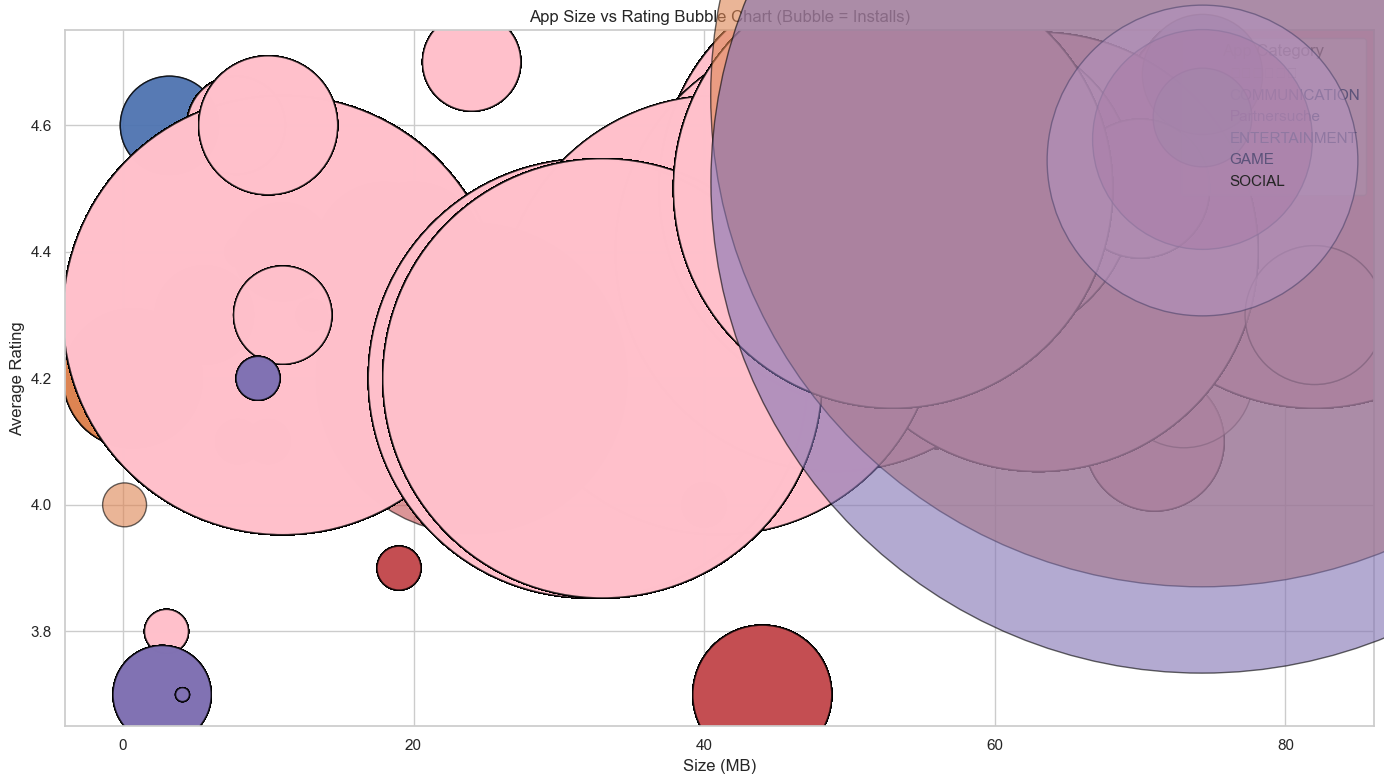

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

# Load datasets
apps_df = pd.read_csv(r"C:\Users\dell\Downloads\Play Store Data (1).csv")
reviews_df = pd.read_csv(r"C:\Users\dell\Downloads\User Reviews.csv")

# Clean Installs
def clean_installs(val):
    try:
        val = str(val).replace('+', '').replace(',', '').strip()
        return int(val) if val.isdigit() else 0
    except:
        return 0

apps_df['Clean_Installs'] = apps_df['Installs'].apply(clean_installs)

# Convert Size to MB
def convert_size(size):
    if pd.isna(size) or size == 'Varies with device':
        return None
    size = str(size).strip()
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return None

apps_df['Size_MB'] = apps_df['Size'].apply(convert_size)

# Merge with reviews
combined_df = pd.merge(apps_df, reviews_df, on='App', how='inner')

# Convert Reviews to numeric
combined_df['Reviews'] = pd.to_numeric(combined_df['Reviews'], errors='coerce')

# Filter based on requirements
target_categories = ['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']

filtered_df = combined_df[
    (combined_df['Rating'] > 3.5) &
    (combined_df['Category'].isin(target_categories)) &
    (combined_df['Reviews'] > 500) &
    (combined_df['App'].apply(lambda x: 's' not in str(x).lower())) &
    (combined_df['Sentiment_Subjectivity'] > 0.5) &
    (combined_df['Clean_Installs'] > 50000)
].copy()

# Translate categories
translations = {
    "BEAUTY": "सौंदर्य",        # Hindi
    "BUSINESS": "வணிகம்",      # Tamil
    "DATING": "Partnersuche"   # German
}
filtered_df['Translated_Category'] = filtered_df['Category'].replace(translations)

# Time condition: Only between 5 PM and 7 PM IST
ist = pytz.timezone('Asia/Kolkata')
current_hour = datetime.now(ist).hour

if 17 <= current_hour < 19:
    plt.figure(figsize=(14, 8))
    sns.set(style="whitegrid")

    for category in filtered_df['Translated_Category'].unique():
        data = filtered_df[filtered_df['Translated_Category'] == category]
        color = 'pink' if 'game' in category.lower() else None
        plt.scatter(
            data['Size_MB'],
            data['Rating'],
            s=data['Clean_Installs'] / 1000,  # scale down install size
            alpha=0.6,
            label=category,
            c=color,
            edgecolors='black'
        )

    plt.title("App Size vs Rating Bubble Chart (Bubble = Installs)")
    plt.xlabel("Size (MB)")
    plt.ylabel("Average Rating")
    plt.legend(title="App Category", loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("This graph is only visible between 5 PM and 7 PM IST.")
